In [1]:
import pandas as pd

titanic_df = pd.read_csv("titanic_data.csv")

## Basic Information

In [2]:
titanic_df.shape

(891, 12)

In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


This DataFrame contains 891 passenger records with 12 features capturing demographic, travel, and survival information.
Most columns are complete, but **Age**, **Cabin**, and **Embarked** have missing values, with **Cabin** being largely sparse.
The dataset includes a mix of numerical and categorical variables, making it suitable for exploratory analysis and survival prediction tasks.


In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Specific Information

In [5]:
titanic_df[["Age", "Fare"]].mean()

Age     29.699118
Fare    32.204208
dtype: float64

In [6]:
titanic_df[["Age", "Fare"]].median()

Age     28.0000
Fare    14.4542
dtype: float64

In [7]:
titanic_df[["Age", "Fare"]].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


**Description:**
    
* Average age of passengers is approximately 29.7 years, indicating that most passengers were relatively young.
* Age distribution is fairly symmetric, as the mean (29.7) and median (28.0) are close.
* The minimum age is 0.42 years (about 5 months), and the oldest passenger is 80 years old.
* There are missing values in the Age column (714 entries vs. 891 for Fare), suggesting some age data is not available.

* For Fare, the mean is 32.20 and the median is 14.45 — a large gap indicating a right-skewed (positively skewed) distribution.
* Fare values range from 0 (free tickets) to over 512, showing a wide spread and presence of outliers or high-paying passengers.
* The high standard deviation (49.69) also supports the presence of large variability in fare prices.


In [8]:
titanic_df.value_counts("Survived")

Survived
0    549
1    342
Name: count, dtype: int64

In [9]:
titanic_df['Embarked'].value_counts(dropna = False, normalize=True)

Embarked
S      0.722783
C      0.188552
Q      0.086420
NaN    0.002245
Name: proportion, dtype: float64

In [10]:
titanic_df.value_counts(["Sex","Survived"], normalize = True)

Sex     Survived
male    0           0.525253
female  1           0.261504
male    1           0.122334
female  0           0.090909
Name: proportion, dtype: float64

Interestingly, death rate of male population is double the survival rate of female counterparts.

In [11]:
titanic_df[titanic_df["Sex"] == "female"].value_counts("Survived", normalize = True)

Survived
1    0.742038
0    0.257962
Name: proportion, dtype: float64

In [12]:
# Embarked from S and gender Male , Survival rate ?

titanic_df[
    (titanic_df.Embarked == "S") & (titanic_df['Sex'] == "male")
].value_counts('Survived')

Survived
0    364
1     77
Name: count, dtype: int64

In [13]:
pd.crosstab(
    titanic_df.Sex,
    titanic_df.Survived,
    margins = True,
    margins_name="Total"
)

Survived,0,1,Total
Sex,,,
female,81,233,314
male,468,109,577
Total,549,342,891


In [14]:
pd.crosstab(
    [titanic_df.Embarked, titanic_df.Pclass],
    [titanic_df.Sex, titanic_df.Survived],
    margins= True
)

Sex             female      male       All
Survived             0    1    0    1     
Embarked Pclass                           
C        1           1   42   25   17   85
         2           0    7    8    2   17
         3           8   15   33   10   66
Q        1           0    1    1    0    2
         2           0    2    1    0    3
         3           9   24   36    3   72
S        1           2   46   51   28  127
         2           6   61   82   15  164
         3          55   33  231   34  353
All                 81  231  468  109  889

In [16]:
# Get unique values
titanic_df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [18]:
titanic_df["Embarked"].nunique(dropna = False)

4

In [28]:
# sum() , prod(), cumsum(), var(), std(), mean(), quantile()
titanic_df.Age.quantile(q=0.75)

np.float64(38.0)

In [32]:
titanic_df.isna().sum(axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 0 -> column wise -> vertival
### 1 -> row wise -> horizontal

In [33]:
# GroupBy

group_by_gender = titanic_df[["Sex","Fare","Age","Survived"]].groupby(by = "Sex")

In [35]:
group_by_gender.mean()

,Fare,Age,Survived
Sex,,,
female,44.479818,27.915709,0.742038
male,25.523893,30.726645,0.188908


In [39]:
group_by_gender.value_counts(["Survived"])

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [40]:
group_by_gender.sum()

,Fare,Age,Survived
Sex,,,
female,13966.6628,7286.00,233
male,14727.2865,13919.17,109


In [43]:
group_by_two = titanic_df.groupby(by = ["Embarked", "Survived"])

In [44]:
group_by_two.mean(numeric_only=True)

PassengerId    Pclass        Age     SibSp     Parch  \
Embarked Survived                                                         
C        0          409.853333  2.200000  33.666667  0.253333  0.253333   
         1          473.989247  1.634409  28.973671  0.494624  0.451613   
Q        0          480.404255  2.936170  30.325000  0.510638  0.276596   
         1          319.966667  2.866667  22.500000  0.300000  0.000000   
S        0          449.868852  2.545667  30.203966  0.611241  0.348946   
         1          448.857143  1.967742  28.113184  0.493088  0.539171   

                        Fare  
Embarked Survived             
C        0         35.443335  
         1         79.720926  
Q        0         13.335904  
         1         13.182227  
S        0         20.743987  
         1         39.547081

In [48]:
## Correlation and Covariance

In [49]:
titanic_df[["Age","Fare"]].cov()

,Age,Fare
Age,211.019125,73.849030
Fare,73.849030,2469.436846


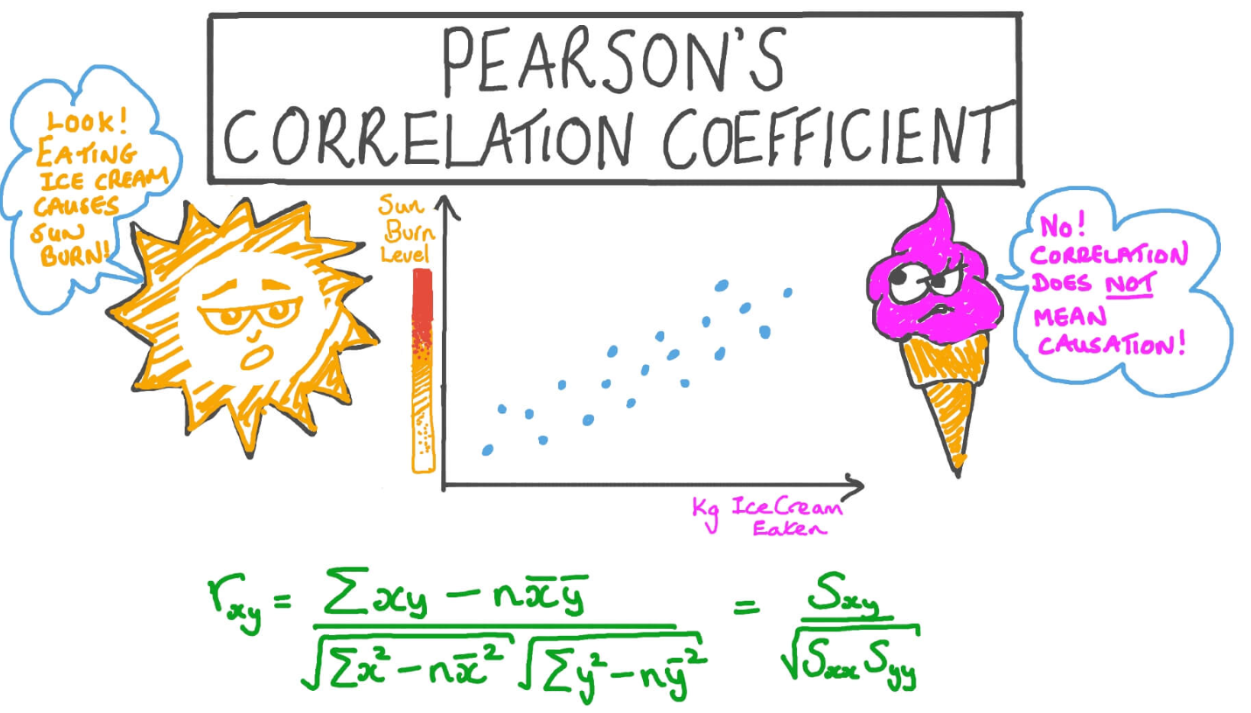

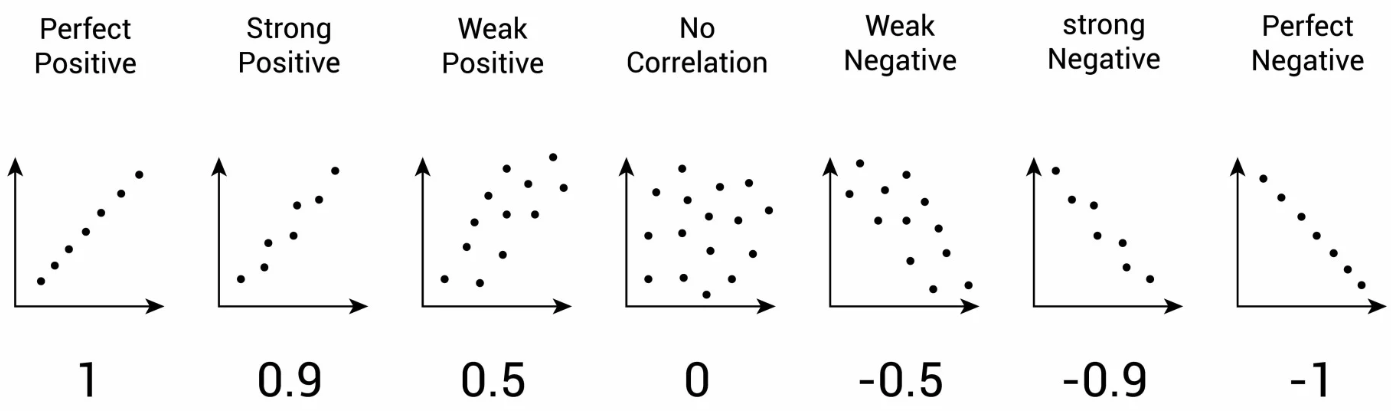

In [51]:
titanic_df[["Age","Fare"]].corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


```-1 , -0.5, 0 , 0.5, 1```

0.096 > no correlation 

In [60]:
sampled = titanic_df.sample(n = 300, random_state = 999)

In [61]:
sampled[["Age","Fare"]].corr()

,Age,Fare
Age,1.00000,0.03441
Fare,0.03441,1.00000


In [65]:
initials = [ data.split(",")[-1].split(".")[0] for data in titanic_df.Name]

In [66]:
titanic_df["Initials"] = initials

In [68]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initials
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
